<a href="https://colab.research.google.com/github/DavidLi1355/debiasing_facial_recognition/blob/master/6S191_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [ ]:
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1MB 8.8MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=6953e21d17d8d69481f0c951540eb6c87ac5b9765f8b7018f9e937d95d863b41
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.0).astype(np.float32)
train_labels = train_labels.astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.0).astype(np.float32)
test_labels = test_labels.astype(np.int64)

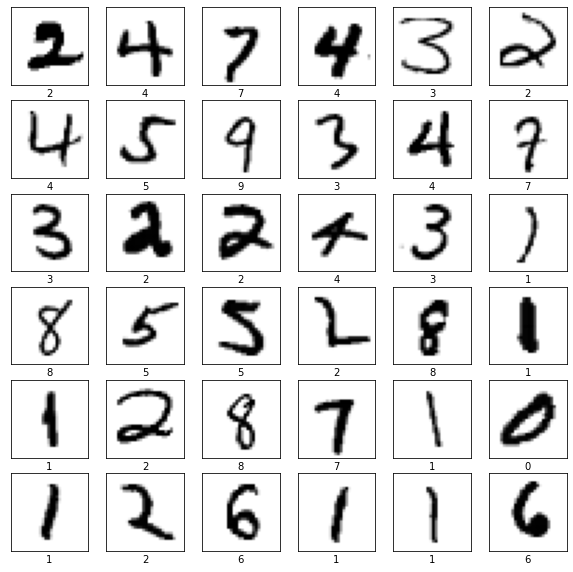

In [ ]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind]) 


In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

In [ ]:
learning_rate = 1e-1

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0169 - accuracy: 0.9972
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0164 - accuracy: 0.9974
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0161 - accuracy: 0.9973
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0158 - accuracy: 0.9975
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0155 - accuracy: 0.9975


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9797
Test accuracy: 0.9797000288963318


In [ ]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(24, 3, activation=tf.nn.relu),
                                   tf.keras.layers.MaxPool2D((2, 2)),
                                   tf.keras.layers.Conv2D(36, 3, activation=tf.nn.relu),
                                   tf.keras.layers.MaxPool2D((2, 2)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return cnn_model

cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               115328    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [ ]:
learning_rate = 1e-1
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0122 - accuracy: 0.9964


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.9898
Test accuracy: 0.989799976348877


In [ ]:
predictions = cnn_model.predict(test_images)

In [ ]:
print(predictions[0])
prediction = np.argmax(predictions[0])
print(prediction)

[2.2493188e-10 1.3472689e-07 1.2212865e-08 1.4715978e-07 5.7752626e-11
 1.0477935e-10 8.2942835e-14 9.9999976e-01 5.3968130e-10 3.5300007e-09]
7


7
(10000, 28, 28, 1)


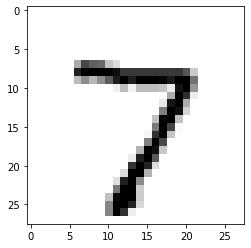

In [ ]:
print(test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
print(test_images.shape)

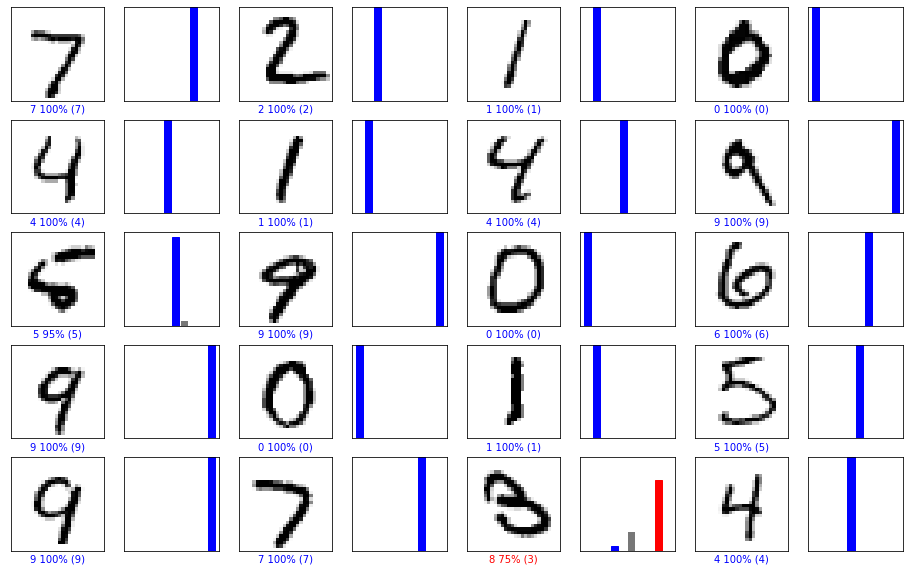

In [ ]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

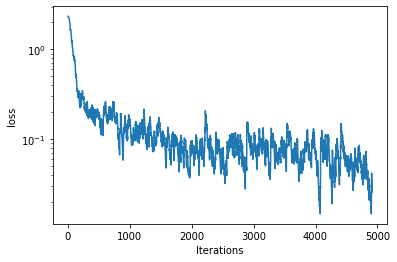

100%|██████████| 5000/5000 [00:36<00:00, 136.78it/s]


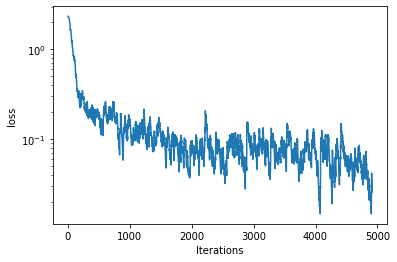

In [ ]:
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'):
  tqdm._instances.clear()

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
  
  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

Part 2

In [ ]:
import tensorflow as tf

import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

!pip install mitdeeplearning
import mitdeeplearning as mdl

     |████████████████████████████████| 2.1MB 12.1MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=99c053fcfe99282a0aba7009ed071ee7c32f15f94d46dc6db9947a030eb50af2
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [ ]:
path_to_training_data = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/bp54q547mfg15ze/train_face.h5?dl=1')
loader = mdl.lab2.TrainingDatasetLoader(path_to_training_data)

1263894528/1263889489 [==============================] - 129s 0us/step
Opening /root/.keras/datasets/train_face.h5
Loading data into memory...


In [ ]:
number_of_training_examples = loader.get_train_size()
(images, labels) = loader.get_batch(100)

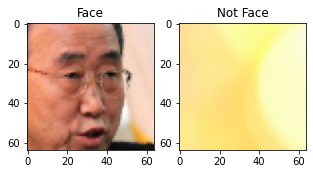

In [ ]:
face_images = images[np.where(labels==1)[0]]
not_face_images = images[np.where(labels==0)[0]]

idx_face = 14 #@param {type:"slider", min:0, max:50, step:1}
idx_not_face = 22 #@param {type:"slider", min:0, max:50, step:1}

plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.imshow(face_images[idx_face])
plt.title("Face"); plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(not_face_images[idx_not_face])
plt.title("Not Face"); plt.grid(False)

In [ ]:
n_filter = 12

def make_standard_classifier(n_outputs=1):
  Conv2D = functools.partial(tf.keras.layers.Conv2D, padding='same', activation='relu')
  BatchNormalization = tf.keras.layers.BatchNormalization
  Flatten = tf.keras.layers.Flatten
  Dense = functools.partial(tf.keras.layers.Dense, activation='relu')

  model = tf.keras.Sequential([
                               Conv2D(filters=1*n_filter, kernel_size=5, strides=2),
                               BatchNormalization(),

                               Conv2D(filters=2*n_filter, kernel_size=5, strides=2),
                               BatchNormalization(),

                               Conv2D(filters=4*n_filter, kernel_size=3, strides=2),
                               BatchNormalization(),

                               Conv2D(filters=6*n_filter, kernel_size=3, strides=2),
                               BatchNormalization(),

                               Flatten(),
                               Dense(512),
                               Dense(n_outputs, activation=None)
  ])
  return model

standard_classifier = make_standard_classifier()

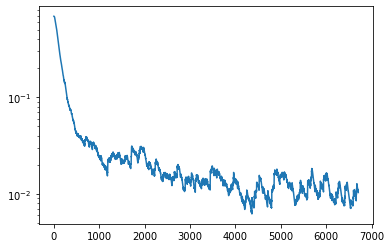

100%|██████████| 3434/3434 [00:37<00:00, 91.39it/s] 


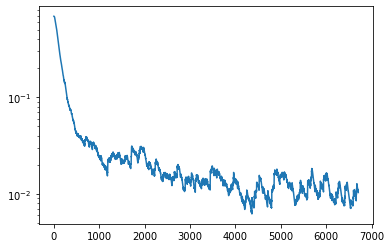

In [ ]:
batch_size = 32
num_epochs = 2
learning_rate = 5e-4

optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_history = mdl.util.LossHistory(smoothing_factor=0.99)
plotter = mdl.util.PeriodicPlotter(sec=2, scale='semilogy')

if hasattr(tqdm, '_instances'):
  tqdm._instances.clear()

@tf.function
def standard_train_step(x, y):
  with tf.GradientTape() as tape:
    logits = standard_classifier(x)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)

  # Backpropagtion
  grads = tape.gradient(loss, standard_classifier.trainable_variables)
  optimizer.apply_gradients(zip(grads, standard_classifier.trainable_variables))
  return loss

# Training loop
for epoch in range(num_epochs):
  for idx in tqdm(range(loader.get_train_size()//batch_size)):
    x, y = loader.get_batch(batch_size)
    loss = standard_train_step(x, y)

    loss_history.append(loss.numpy().mean())
    plotter.plot(loss_history.get())

In [ ]:
(batch_x, batch_y) = loader.get_batch(5000)
y_pred_standard = tf.round(tf.nn.sigmoid(standard_classifier.predict(batch_x)))
acc_standard = tf.reduce_mean(tf.cast(tf.equal(batch_y, y_pred_standard), tf.float32))

print("Standard CNN accuracy on (potentially biased) training set: {:.4f}".format(acc_standard.numpy()))

Standard CNN accuracy on (potentially biased) training set: 0.9972


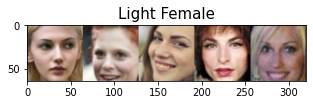

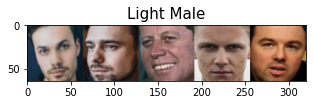

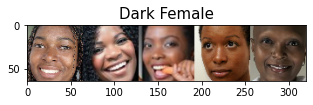

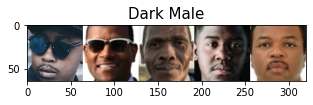

In [ ]:
test_faces = mdl.lab2.get_test_faces()
keys = ['Light Female', 'Light Male', 'Dark Female', 'Dark Male']
for group, key in zip(test_faces, keys):
  plt.figure(figsize=(5, 5))
  plt.imshow(np.hstack(group))
  plt.title(key, fontsize=15)

Text(0.5, 1.0, 'Standard classifier predictions')

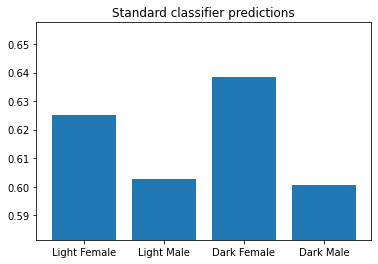

In [ ]:
standard_classifier_logits = [standard_classifier(np.array(x, dtype=np.float32)) for x in test_faces]
standard_classifier_probs = tf.squeeze(tf.sigmoid(standard_classifier_logits))

xx = range(len(keys))
yy = standard_classifier_probs.numpy().mean(1)
plt.bar(xx, yy)
plt.xticks(xx, keys)
plt.ylim(max(0, yy.min()-yy.ptp()/2.0), yy.max()+yy.ptp()/2.0)
plt.title('Standard classifier predictions')

The equations for both of these losses are provided below:
$$ L_{KL}(\mu, \sigma) = \frac{1}{2}\sum\limits_{j=0}^{k-1}\small{(\sigma_j + \mu_j^2 - 1 - \log{\sigma_j})} $$$$ L_{x}{(x,\hat{x})} = ||x-\hat{x}||_1 $$
Thus for the VAE loss we have:
$$ L_{VAE} = c\cdot L_{KL} + L_{x}{(x,\hat{x})} $$

In [ ]:
def vae_loss_function(x, x_recon, mu, logsigma, kl_weight=0.0005):
  latent_loss = 0.5 * tf.reduce_sum(tf.exp(logsigma) + tf.square(mu) -1 - logsigma, axis=1)

  reconstruction_loss = tf.reduce_sum(tf.abs(x - x_recon), axis=(1,2,3))   

  vae_loss = kl_weight * latent_loss + reconstruction_loss
  return vae_loss

In [ ]:
def sampling(z_mean, z_logsigma):
  batch, latent_dim = z_mean.shape
  epsilon = tf.random.normal(shape=(batch, latent_dim))

  z = z_mean + tf.math.exp(0.5 * z_logsigma) * epsilon
  return z

In [ ]:
def debiasing_loss_function(x, x_pred, y, y_logit, mu, logsigma):
  vae_loss = vae_loss_function(x, x_pred, mu, logsigma)
  classification_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_logit)
  face_indicator = tf.cast(tf.equal(y, 1), tf.float32)
  total_loss = tf.reduce_mean(classification_loss + face_indicator * vae_loss)
  return total_loss, classification_loss

In [ ]:
n_filters = 12
latent_dim = 100

def make_face_decoder_network():
  Conv2DTranspose = functools.partial(tf.keras.layers.Conv2DTranspose, padding='same', activation='relu')
  BatchNormalization = tf.keras.layers.BatchNormalization
  Flatten = tf.keras.layers.Flatten
  Dense = functools.partial(tf.keras.layers.Dense, activation='relu')
  Reshape = tf.keras.layers.Reshape

  decoder = tf.keras.Sequential([
                                 Dense(units=4*4*6*n_filters),
                                 Reshape(target_shape=(4, 4, 6*n_filters)),

                                 Conv2DTranspose(filters=4*n_filters, kernel_size=3,  strides=2),
                                 Conv2DTranspose(filters=2*n_filters, kernel_size=3,  strides=2),
                                 Conv2DTranspose(filters=1*n_filters, kernel_size=5,  strides=2),
                                 Conv2DTranspose(filters=3, kernel_size=5,  strides=2)
  ])

  return decoder

In [ ]:
class DB_VAE(tf.keras.Model):
  def __init__(self, latent_dim):
    super(DB_VAE, self).__init__()
    self.latent_dim = latent_dim

    num_encoder_dims = 2 * self.latent_dim + 1

    self.encoder = make_standard_classifier(num_encoder_dims)
    self.decoder = make_face_decoder_network()

  def encode(self, x):
    encoder_output = self.encoder(x)

    y_logit = tf.expand_dims(encoder_output[:, 0], -1)
    z_mean = encoder_output[:, 1:self.latent_dim+1]
    z_logsigma = encoder_output[:, self.latent_dim+1:]

    return y_logit, z_mean, z_logsigma

  def reparameterize(self, z_mean, z_logsigma):
    z = sampling(z_mean, z_logsigma)
    return z

  def decode(self, z):
    reconstruction = self.decoder(z)
    return reconstruction

  def call(self, x):
    y_logit, z_mean, z_logsigma = self.encode(x)
    z = self.reparameterize(z_mean, z_logsigma)
    recon = self.decode(z)

    return y_logit, z_mean, z_logsigma, recon

  def predict(self, x):
    y_logit, z_mean, z_logsigma = self.encode(x)
    return y_logit

dbvae = DB_VAE(latent_dim)

In [ ]:
def get_latent_mu(images, dbvae, batch_size=1024):
  N = images.shape[0]
  mu = np.zeros((N, latent_dim))
  for start_ind in range(0, N, batch_size):
    end_ind = min(start_ind+batch_size, N+1)
    batch = (images[start_ind:end_ind]).astype(np.float32)/255.0
    _, batch_mu, _ = dbvae.encode(batch)
    mu[start_ind:end_ind] = batch_mu
  return mu

In [ ]:
def get_training_sample_probabilities(images, dbvae, bins=10, smoothing_fac=0.001):
  print('Recomputing the sampling probabilities')

  mu = get_latent_mu(images, dbvae)
  training_sample_p = np.zeros(mu.shape[0])

  for i in range(latent_dim):
    latent_distribution = mu[:,i]
    hist_density, bin_edges = np.histogram(latent_distribution, density=True, bins=bins)

    bin_edges[0] = -float('inf')
    bin_edges[-1] = float('inf')

    bin_idx = np.digitize(latent_distribution, bin_edges)

    hist_smoothed_density = hist_density + smoothing_fac
    hist_smoothed_density = hist_smoothed_density / np.sum(hist_smoothed_density)

    p = 1.0 / hist_smoothed_density[bin_idx-1]
    p = p / np.sum(p)
    training_sample_p = np.maximum(p, training_sample_p)

  training_sample_p /= np.sum(training_sample_p)

  return training_sample_p

Starting epoch 6/6
Recomputing the sampling probabilities


  0%|          | 0/3434 [00:00<?, ?it/s]

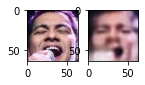

 14%|█▍        | 487/3434 [00:03<00:22, 133.93it/s]

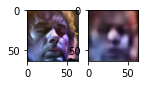

 29%|██▉       | 993/3434 [00:07<00:19, 127.19it/s]

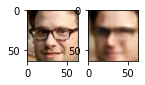

 43%|████▎     | 1493/3434 [00:11<00:14, 132.56it/s]

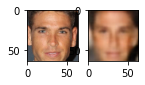

 58%|█████▊    | 1992/3434 [00:15<00:10, 134.82it/s]

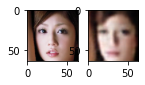

 72%|███████▏  | 2488/3434 [00:19<00:07, 132.33it/s]

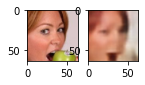

 87%|████████▋ | 2998/3434 [00:23<00:03, 129.79it/s]

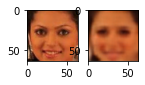

100%|██████████| 3434/3434 [00:27<00:00, 124.97it/s]


In [ ]:
batch_size = 32
learning_rate = 5e-4
latent_dim = 100

num_epochs = 6

dbvae = DB_VAE(100)
optimizer = tf.keras.optimizers.Adam(learning_rate)

@tf.function
def debiasing_train_step(x, y):
  with tf.GradientTape() as tape:
    y_logit, z_mean, z_logsigma, x_recon = dbvae(x)
    loss, class_loss = debiasing_loss_function(x, x_recon, y, y_logit, z_mean, z_logsigma)

  grads = tape.gradient(loss, dbvae.trainable_variables)
  optimizer.apply_gradients(zip(grads, dbvae.trainable_variables))
  return loss

all_faces = loader.get_all_train_faces()

if hasattr(tqdm, '_instances'): 
  tqdm._instances.clear()

for i in range(num_epochs):
  IPython.display.clear_output(wait=True)
  print("Starting epoch {}/{}".format(i+1, num_epochs))

  p_faces = get_training_sample_probabilities(all_faces, dbvae)
  
  for j in tqdm(range(loader.get_train_size() // batch_size)):
    (x, y) = loader.get_batch(batch_size, p_pos=p_faces)
    loss = debiasing_train_step(x, y)
    
    if j % 500 == 0: 
      mdl.util.plot_sample(x, y, dbvae)

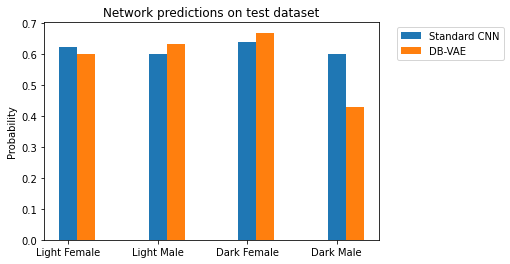

In [ ]:
dbvae_logits = [dbvae.predict(np.array(x, dtype=np.float32)) for x in test_faces]
dbvae_probs = tf.squeeze(tf.sigmoid(dbvae_logits))

xx = np.arange(len(keys))
plt.bar(xx, standard_classifier_probs.numpy().mean(1), width=0.2, label="Standard CNN")
plt.bar(xx+0.2, dbvae_probs.numpy().mean(1), width=0.2, label="DB-VAE")
plt.xticks(xx, keys); 
plt.title("Network predictions on test dataset")
plt.ylabel("Probability"); plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");